# Binary Classification of Machine Failure


Note: Imbalance Classification Problem

[here](https://www.kaggle.com/competitions/playground-series-s3e17/data)

In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [2]:
# read csv and create pandas DataFrame
original_df = pd.read_csv("./data/input/original.csv")
train_df = pd.read_csv("./data/input/train.csv")
test_df = pd.read_csv("./data/input/test.csv")

# drop id columns
original_df = original_df.drop(['UDI', 'Product ID'], axis=1)
train_df = train_df.drop(['id', 'Product ID'], axis=1)
test_df = test_df.drop(['id', 'Product ID'], axis=1)

### Duplicate Check

In [3]:
org_df_dup_check = original_df.drop_duplicates()

print(f"Number of Duplicate Records (original_df): {original_df.shape[0] - org_df_dup_check.shape[0]}")

Number of Duplicate Records (original_df): 0


In [4]:
train_df_dup_check = train_df.drop_duplicates()

print(f"Number of Duplicate Records (train_df): {train_df.shape[0] - train_df_dup_check.shape[0]}")

Number of Duplicate Records (train_df): 1156


### Rename Columns

In [5]:
rename_mapper = {
    'Type' : 'type',
    'Air temperature [K]' : 'air_temp', 
    'Process temperature [K]' : 'process_temp',
    'Rotational speed [rpm]' : 'rot_speed',
    'Torque [Nm]' : 'torque',
    'Tool wear [min]' : 'tool_wear',
    'Machine failure' : 'machine_failure'

}

original_df = org_df_dup_check.rename(rename_mapper, axis=1)
train_df = train_df_dup_check.rename(rename_mapper, axis=1)
test_df = test_df.rename(rename_mapper, axis=1)

### Encode Categorical Columns

In [6]:
# encode categorical column

from sklearn.preprocessing import OrdinalEncoder

# Risk rating. H = High. M = Medium. L = Low.
encoder = OrdinalEncoder(categories = [['L', 'M', 'H']], dtype='int')

train_df['type'] = encoder.fit_transform(train_df[['type']]).flatten()
test_df['type'] = encoder.transform(test_df[['type']]).flatten()
original_df['type'] = encoder.transform(original_df[['type']]).flatten()

## EDA

Text(0.5, 0.98, 'Machine Type Count Distribution')

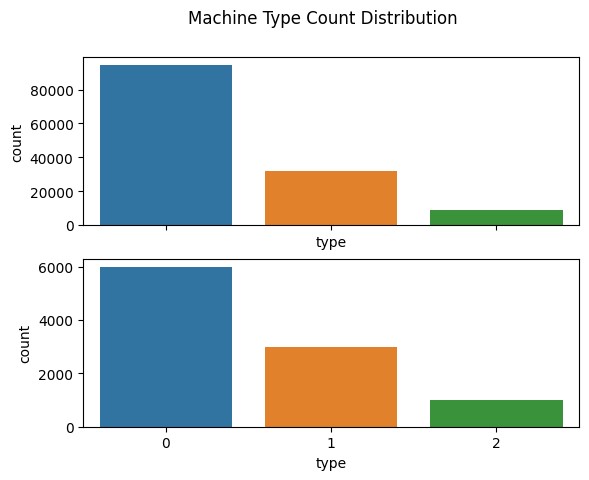

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1, ax2 = axs

sns.countplot(data = original_df, x = 'type', ax=ax2)
sns.countplot(data = train_df, x = 'type', ax=ax1)

plt.suptitle("Machine Type Count Distribution")

Text(0.5, 0.98, 'Machine Failure Count Distribution')

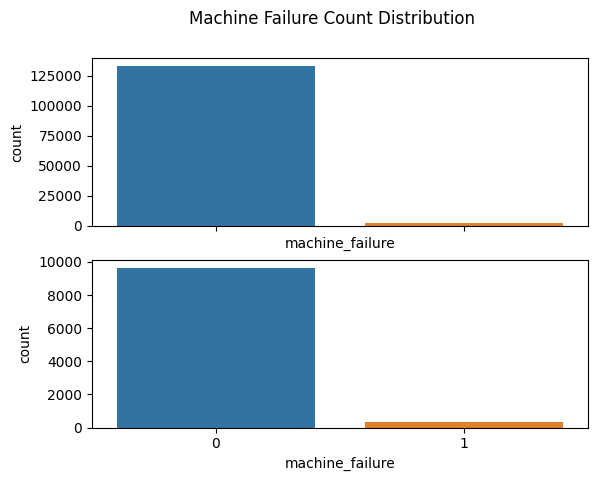

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1, ax2 = axs

sns.countplot(data = original_df, x = 'machine_failure', ax=ax2)
sns.countplot(data = train_df, x = 'machine_failure', ax=ax1)

plt.suptitle("Machine Failure Count Distribution")

Text(0.5, 1.0, 'Original Data - Histogram')

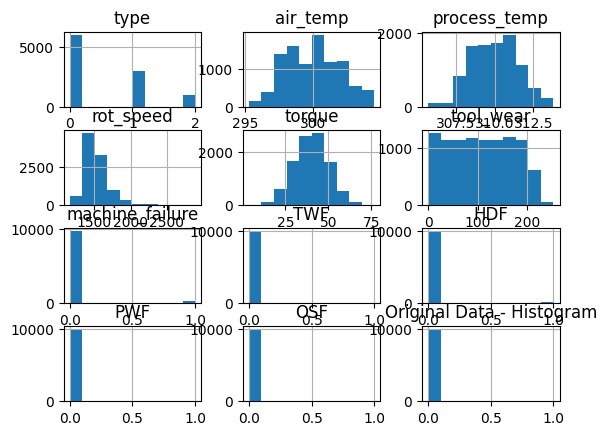

In [9]:
original_df.hist()
plt.title("Original Data - Histogram")

Text(0.5, 1.0, 'Train Data - Histogram')

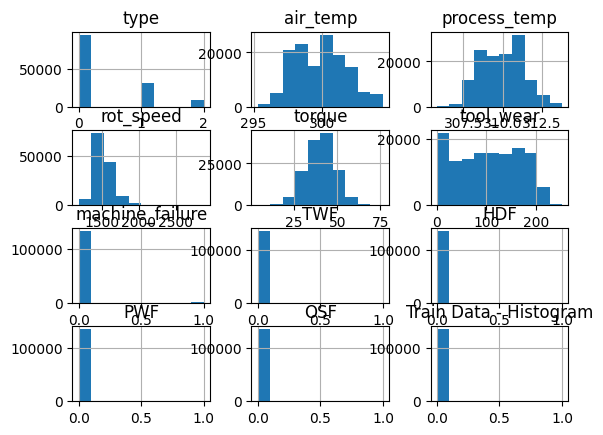

In [10]:
train_df.hist()
plt.title("Train Data - Histogram")

<Axes: xlabel='machine_failure', ylabel='process_temp'>

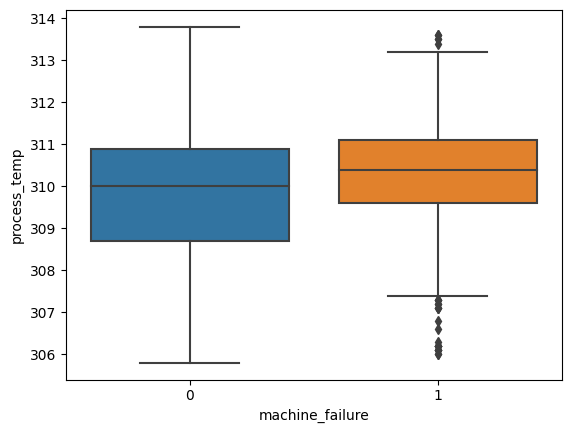

In [11]:
sns.boxplot(data=train_df, x = 'machine_failure', y = 'process_temp')

<Axes: xlabel='machine_failure', ylabel='process_temp'>

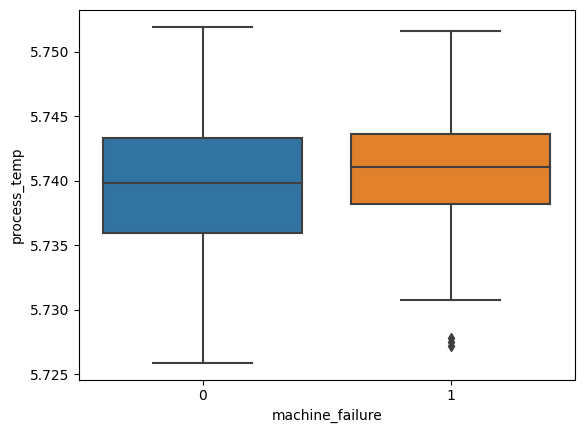

In [12]:
# sns.boxplot(data=original_df, x = 'machine_failure', y = 'process_temp')
sns.boxplot(x = original_df['machine_failure'], y = np.log1p(original_df['process_temp']))

In [13]:
train_df.skew()

type                1.415928
air_temp            0.161988
process_temp        0.057966
rot_speed           1.882867
torque             -0.031183
tool_wear          -0.026844
machine_failure     7.781749
TWF                25.443405
HDF                13.783356
PWF                20.487552
OSF                15.836825
RNF                20.954251
dtype: float64

In [14]:
original_df.skew()

type                0.993856
air_temp            0.114274
process_temp        0.015027
rot_speed           1.993171
torque             -0.009517
tool_wear           0.027292
machine_failure     5.151852
TWF                14.644462
HDF                 9.164789
PWF                10.114516
OSF                 9.953916
RNF                22.879570
dtype: float64

In [15]:
from sklearn.preprocessing import RobustScaler

test_df_scaled = test_df.copy()

df_scaled = pd.concat([original_df, train_df], ignore_index=True).drop_duplicates()

scaler = RobustScaler()

columns_to_scale =  ['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear']

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
test_df_scaled[columns_to_scale] = scaler.transform(test_df_scaled[columns_to_scale])

In [16]:
df_scaled.skew()

type                1.382710
air_temp            0.160261
process_temp        0.055806
rot_speed           1.928485
torque             -0.031872
tool_wear          -0.023226
machine_failure     7.475283
TWF                23.852518
HDF                13.230126
PWF                18.629499
OSF                15.074181
RNF                21.071213
dtype: float64

array([[<Axes: title={'center': 'air_temp'}>,
        <Axes: title={'center': 'process_temp'}>],
       [<Axes: title={'center': 'rot_speed'}>,
        <Axes: title={'center': 'torque'}>],
       [<Axes: title={'center': 'tool_wear'}>, <Axes: >]], dtype=object)

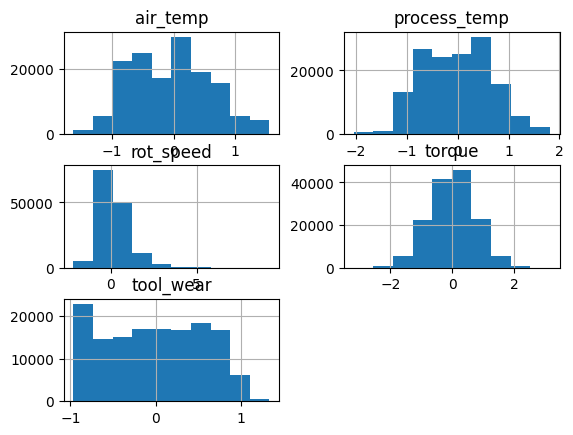

In [17]:
df_scaled[columns_to_scale].hist()

In [18]:
df_scaled.describe()

,type,air_temp,process_temp,rot_speed,torque,tool_wear,machine_failure,TWF,HDF,PWF,OSF,RNF
count,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000,145270.000000
mean,0.376712,-0.043782,-0.025876,0.182851,-0.007184,-0.012687,0.016989,0.001748,0.005617,0.002857,0.004344,0.002237
std,0.608943,0.645779,0.662865,0.939716,0.748110,0.581202,0.129231,0.041778,0.074737,0.053372,0.065763,0.047246
min,0.000000,-1.620690,-2.047619,-2.158940,-3.182609,-0.963636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.586207,-0.571429,-0.410596,-0.504348,-0.518182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.413793,0.428571,0.589404,0.495652,0.481818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.551724,1.809524,9.218543,3.147826,1.336364,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
label = 'machine_failure'
features = df_scaled.columns.drop(label).tolist()

org_train_X = df_scaled[features].to_numpy()
org_train_y = df_scaled[label].to_numpy()

test_unseen_X = test_df_scaled[features].to_numpy()

np.savez_compressed('./data/transformed/org_and_train_preprocessed', X = org_train_X, y = org_train_y)
np.savez_compressed('./data/transformed/test_unseen_preprocessed', X = test_unseen_X)